In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, sys, matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature

sys.path.insert(0, '../src/Ostrich_support/')
from cal_metrics_NoRouting import *

In [34]:
infile_info = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/shared_data_Sean/info_ESMFmesh_ctsm_HCDN_nhru_final_671.buff_fix_holes_polygons_simplified_5e-4_split_nested.csv'
inpath_calib = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG'

df_info = pd.read_csv(infile_info)
df_info = df_info[10::10]
lon, lat = df_info['lon_cen'].values, df_info['lat_cen'].values

In [175]:
tarindex = 17

In [176]:
if tarindex == 9:

    path_bestmodel = '/glade/u/home/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_100_OstCalib/archive/PreserveBestModel'
    path_compare = '/glade/u/home/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_100_OstCalib/archive/PreserveModelOutput/Run_22/'
    add_flow_file = 'file1,file2'
    date_start='1995-10-01'      # start date for calculating statistics
    date_end='1999-10-01'       # end date for calculating statistics
    pathCTSM = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_100'
    ref_streamflow = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_100_OstCalib/refdata/streamflow_data.csv'


if tarindex == 12:
    path_bestmodel = '/glade/u/home/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_130_OstCalib/archive/PreserveBestModel'
    path_compare = '/glade/u/home/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_130_OstCalib/archive/PreserveModelOutput/Run_12/'
    add_flow_file = 'file1,file2'
    date_start='1995-10-01'      # start date for calculating statistics
    date_end='1999-10-01'       # end date for calculating statistics
    pathCTSM = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_130'
    ref_streamflow = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_130_OstCalib/refdata/streamflow_data.csv'



if tarindex == 17:
    path_bestmodel = '/glade/u/home/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_180_OstCalib/archive/PreserveBestModel'
    path_compare = '/glade/u/home/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_180_OstCalib/archive/PreserveModelOutput/Run_15/'
    add_flow_file = 'file1,file2'
    date_start='1995-10-01'      # start date for calculating statistics
    date_end='1999-10-01'       # end date for calculating statistics
    pathCTSM = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_180'
    ref_streamflow = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_180_OstCalib/refdata/streamflow_data.csv'  

# if tarindex = 55:
#     path_bestmodel = '/glade/u/home/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_130_OstCalib/archive/PreserveBestModel'
#     path_compare = '/glade/u/home/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_130_OstCalib/archive/PreserveModelOutput/Run_12/'
#     add_flow_file = 'file1,file2'
#     date_start='1994-10-01'      # start date for calculating statistics
#     date_end='1998-10-01'       # end date for calculating statistics
#     pathCTSM = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_130'
    
# path_bestmodel = '/glade/u/home/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_300_OstCalib/archive/PreserveBestModel'
# path_compare = '/glade/u/home/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_300_OstCalib/archive/PreserveModelOutput/Run_3/'
# add_flow_file = 'file1,file2'
# date_start='1985-10-01'      # start date for calculating statistics
# date_end='1989-10-01'       # end date for calculating statistics
# pathCTSM = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_300'
# ref_streamflow = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_300_OstCalib/refdata/streamflow_data.csv'


######## default variable names
clm_q_name = 'QRUNOFF' # default runoff variable name
clm_q_sdim = 'lndgrid' # spatial dim name
ref_q_name = 'Runoff_cms'
ref_q_date = 'Date'
keyword = ".clm2.h1."

CTSMfilelist = glob.glob(f'{path_bestmodel}/*{keyword}*nc')
CTSMfilelist.sort()
CTSMfilelistcomp = glob.glob(f'{path_compare}/*{keyword}*nc')
CTSMfilelistcomp.sort()

In [177]:
########################################################################################################################
# load CTSM streamflow (m3/s)
ds_simu = main_read_CTSM_streamflow(pathCTSM, CTSMfilelist, date_start, date_end, clm_q_name, clm_q_sdim)
ds_simucomp = main_read_CTSM_streamflow(pathCTSM, CTSMfilelistcomp, date_start, date_end, clm_q_name, clm_q_sdim)

########################################################################################################################
# load CAMELS observation streamflow (m3/s)
ds_q_obs = read_CAMELS_Q_and_to_xarray(ref_streamflow, ref_q_date, ref_q_name)

########################################################################################################################
# add upstream flows to simulated streamflow
ds_simu = add_upstream_flow(add_flow_file, ds_simu, ref_q_date, ref_q_name, clm_q_name)
ds_simucomp = add_upstream_flow(add_flow_file, ds_simucomp, ref_q_date, ref_q_name, clm_q_name)

########################################################################################################################
# evaluation

ds_q_obs = ds_q_obs.sel(time=ds_q_obs.time.isin(ds_simu.time))
ds_simucomp = ds_simucomp.sel(time=ds_simucomp.time.isin(ds_q_obs.time))
ds_simu = ds_simu.sel(time=ds_simu.time.isin(ds_q_obs.time))

kge_q = get_modified_KGE(obs=ds_q_obs[ref_q_name].values, sim=ds_simu[clm_q_name].values)
rmse_q = get_RMSE(obs=ds_q_obs[ref_q_name].values, sim=ds_simu[clm_q_name].values)
kge_qcomp = get_modified_KGE(obs=ds_q_obs[ref_q_name].values, sim=ds_simucomp[clm_q_name].values)
rmse_qcomp = get_RMSE(obs=ds_q_obs[ref_q_name].values, sim=ds_simucomp[clm_q_name].values)

print("Calibration KGE':", kge_q)
print("Calibration KGE' comp:", kge_qcomp)

Use streamflow reference file: /glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG/CAMELS_180_OstCalib/refdata/streamflow_data.csv
File does not exist: file1
Remove it from add flow file list
File does not exist: file2
Remove it from add flow file list
File does not exist: file1
Remove it from add flow file list
File does not exist: file2
Remove it from add flow file list
Calibration KGE': 0.4416241072824679
Calibration KGE' comp: -0.4757889095333274


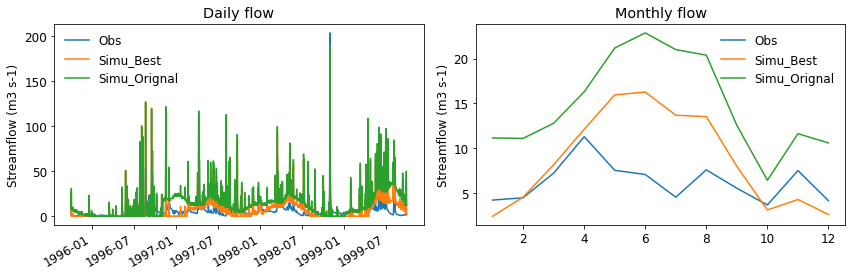

In [178]:
fig, axs = plt.subplots(1, 2, figsize=[12, 4])

axi = axs[0]
ds_q_obs.Runoff_cms.plot(ax=axi, label='Obs')
ds_simu.QRUNOFF.plot(ax=axi, label='Simu_Best')
ds_simucomp.QRUNOFF.plot(ax=axi, label='Simu_Orignal')
axi.set_xlabel('')
axi.set_ylabel('Streamflow (m3 s-1)')
axi.set_title('Daily flow')
axi.legend(frameon=False)

axi = axs[1]
ds_q_obs.Runoff_cms.groupby("time.month").mean().plot(ax=axi, label='Obs')
ds_simu.QRUNOFF.groupby("time.month").mean().plot(ax=axi, label='Simu_Best')
ds_simucomp.QRUNOFF.groupby("time.month").mean().plot(ax=axi, label='Simu_Orignal')
axi.set_xlabel('')
axi.set_ylabel('Streamflow (m3 s-1)')
axi.set_title('Monthly flow')
axi.legend(frameon=False)

plt.tight_layout()
# plt.show()
# plt.savefig('CAMELS_130_calib_Q.png', dpi=600, bbox_inches='tight', pad_inches=0)

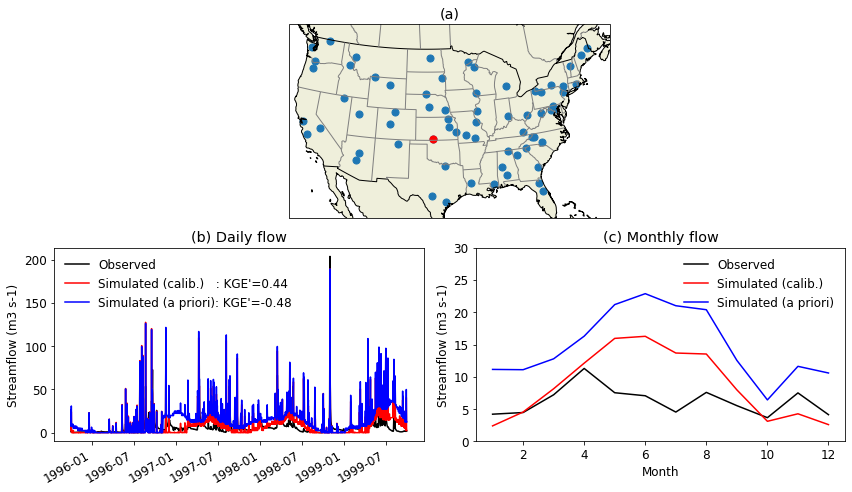

In [179]:
def set_background(ax):
    ax.set_extent([-121, -72, 25, 50])

    # Background boundaries
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray')
    
    return ax

font = {'size'   : 12}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=[12, 7])

proj = ccrs.AlbersEqualArea(central_longitude=-100)
transf = ccrs.PlateCarree()

ax = fig.add_subplot(2, 1, 1, projection=proj)
ax = set_background(ax)
p = ax.scatter(lon, lat, 50, transform=transf)
p = ax.scatter(lon[tarindex], lat[tarindex], 50, color='r', transform=transf)
ax.set_title('(a)')


axi = fig.add_subplot(2, 2, 3)
ds_q_obs.Runoff_cms.plot(ax=axi, color='k', label='Observed')
ds_simu.QRUNOFF.plot(ax=axi, color='r', label=f"Simulated (calib.)   : KGE'={kge_q:.2f}")
ds_simucomp.QRUNOFF.plot(ax=axi, color='b', label=f"Simulated (a priori): KGE'={kge_qcomp:.2f}")
axi.set_xlabel('')
axi.set_ylabel('Streamflow (m3 s-1)')
axi.set_title('(b) Daily flow')
axi.legend(frameon=False)
if tarindex == 9:
    axi.set_ylim(0, 30)



axi = fig.add_subplot(2, 2, 4)
ds_q_obs.Runoff_cms.groupby("time.month").mean().plot(ax=axi, color='k', label='Observed')
ds_simu.QRUNOFF.groupby("time.month").mean().plot(ax=axi, color='r', label='Simulated (calib.)')
ds_simucomp.QRUNOFF.groupby("time.month").mean().plot(ax=axi, color='b', label='Simulated (a priori)')
axi.set_xlabel('Month')
axi.set_ylabel('Streamflow (m3 s-1)')
axi.set_title('(c) Monthly flow')
axi.legend(frameon=False)

if tarindex == 17:
    axi.set_ylim(0, 30)


plt.tight_layout()
plt.savefig(f"CAMELS_calib_timeseries_{df_info.iloc[tarindex]['mesh_id']}.png", dpi=600, bbox_inches='tight', pad_inches=0)